Financial Wellness Scoring System

TYPE: Behavioral Scoring Prototype (NOT a predictive risk model)

PURPOSE: Compute an interpretable financial wellness score (0–100)
using behavioral ratios and exploratory clustering.

IMPORTANT SCOPE STATEMENT:
   This system computes scores for new users by APPLYING a fixed
   scoring framework. 
   
   It does NOT predict future outcomes.
   
   No outcome labels (defaults, missed payments, stress events)
   are available; therefore, this is NOT a supervised or predictive model.
   
   Clustering is used for exploratory pattern discovery and interpretation, not ground-truth validation.

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("financial_data_google_form.csv")
df.head()

,Income,Monthly_Spend,Savings_Percent,Emergency_Fund,Debt,Savings_Amount,Expense_to_Income_Ratio,Debt_to_Income_Ratio
0,137875,104507,16,271292,411276,22060,0.76,2.98
1,77586,63308,0,46069,486119,0,0.82,6.27
2,86096,66189,17,205050,224773,14636,0.77,2.61
3,125371,94915,11,363038,334566,13790,0.76,2.67
4,127202,101609,10,241005,382276,12720,0.80,3.01


Data Cleaning
 
 Remove whitespace from column names
 
 Convert numeric strings (including comma-formatted values) to floats

In [5]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Convert all columns to numeric safely
for col in df.columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   income                   200 non-null    float64
 1   monthly_spend            200 non-null    float64
 2   savings_percent          200 non-null    float64
 3   emergency_fund           200 non-null    float64
 4   debt                     200 non-null    float64
 5   savings_amount           200 non-null    float64
 6   expense_to_income_ratio  200 non-null    float64
 7   debt_to_income_ratio     200 non-null    float64
dtypes: float64(8)
memory usage: 12.6 KB


In [6]:
print("\n--- Info ---")
print(df.info())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   income                   200 non-null    float64
 1   monthly_spend            200 non-null    float64
 2   savings_percent          200 non-null    float64
 3   emergency_fund           200 non-null    float64
 4   debt                     200 non-null    float64
 5   savings_amount           200 non-null    float64
 6   expense_to_income_ratio  200 non-null    float64
 7   debt_to_income_ratio     200 non-null    float64
dtypes: float64(8)
memory usage: 12.6 KB
None


In [8]:
print("\n--- Describe ---")
print(df.describe(include='all'))


--- Describe ---
              income  monthly_spend  savings_percent  emergency_fund  \
count     200.000000     200.000000       200.000000    2.000000e+02   
mean    82563.055000   60803.990000        14.580000    2.487952e+05   
std     34816.402535   27963.112392        10.241977    2.842280e+05   
min     21695.000000   15252.000000         0.000000    2.293000e+03   
25%     52266.500000   36828.000000         7.000000    7.508750e+04   
50%     82071.500000   56967.000000        14.000000    1.649475e+05   
75%    113759.000000   83640.000000        19.000000    3.045422e+05   
max    149761.000000  131157.000000        44.000000    1.540960e+06   

                debt  savings_amount  expense_to_income_ratio  \
count     200.000000      200.000000               200.000000   
mean   284458.130000    11938.565000                 0.734900   
std    215610.560178    10233.578523                 0.126622   
min      1580.000000        0.000000                 0.460000   
25%    1

In [ ]:
features = [
    "income",
    "monthly_spend",
    "savings_percent",
    "emergency_fund",
    "debt",
    "savings_amount",
    "expense_to_income_ratio",
    "debt_to_income_ratio"
]

X = df[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


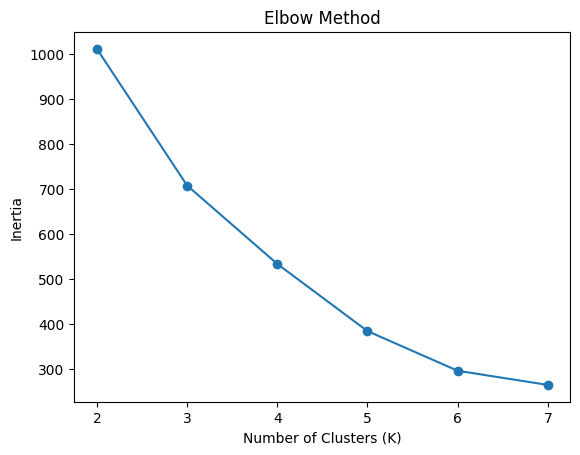

In [ ]:
inertia = []

K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


DECISION:

Although K=5 yielded a marginally higher silhouette score, K=4 was selected as it provided a better balance between cluster separation and interpretability, aligning with the elbow method and enabling clearer behavioral segmentation for financial wellness scoring

Thats why we take K=4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)



In [ ]:
cluster_summary = df.groupby("cluster")[features].mean()
cluster_summary


,income,monthly_spend,savings_percent,emergency_fund,debt,savings_amount,expense_to_income_ratio,debt_to_income_ratio
cluster,,,,,,,,
0,110932.307692,80360.903846,15.442308,261797.442308,320703.865385,17070.288462,0.725385,2.865192
1,78887.585366,43087.121951,30.463415,657779.243902,59948.804878,24039.317073,0.543415,0.762927
2,112620.875000,97408.843750,3.875000,94551.406250,654911.906250,4304.781250,0.865625,5.819687
3,52078.293333,41311.680000,9.866667,82013.133333,223999.240000,5022.573333,0.790400,4.271733


Cluster Interpretation
 
 Clusters are descriptively named based on observed behavior.
 
 These labels are NOT ground truth risk classes.

In [ ]:
cluster_name_map = {
    0: "Financially Fragile",
    1: "High Income, Low Efficiency",
    2: "Budget-Constrained but Disciplined",
    3: "Financially Secure Savers"
}

df["cluster_name"] = df["cluster"].map(cluster_name_map)


Financial Wellness Scoring Logic

SCORING PHILOSOPHY:

Rule-based, interpretable, heuristic

Designed as a BEHAVIORAL PROXY, not outcome prediction

Weights reflect a conservative, risk-sensitive stance

WEIGHTS (sum to 100%):

Savings Percent: 30% (positive)

Expense-to-Income: 25% (negative)

Debt-to-Income: 30% (negative)

Emergency Fund Ratio: 15% (positive)

In [ ]:
# Normalize emergency fund relative to income
df["emergency_fund_ratio"] = df["emergency_fund"] / df["income"]

# Build raw wellness score (updated weights)
df["raw_wellness_score"] = (
    0.30 * (df["savings_percent"] / 100) +
    0.25 * (1 - df["expense_to_income_ratio"]) -
    0.30 * (df["debt_to_income_ratio"]) +
    0.15 * (df["emergency_fund_ratio"])
)

# Scale to 0–100
df["wellness_score"] = (
    (df["raw_wellness_score"] - df["raw_wellness_score"].min()) /
    (df["raw_wellness_score"].max() - df["raw_wellness_score"].min())
) * 100

# Clamp for safety
df["wellness_score"] = df["wellness_score"].clip(0, 100)


The scoring logic assigns higher penalties to debt relative to savings to reflect the disproportionate impact of debt obligations on financial stability. Emergency funds are treated as a stabilizing factor rather than a primary driver, while savings behavior remains a core positive indicator

In [ ]:
min_score = df["raw_wellness_score"].min()
max_score = df["raw_wellness_score"].max()


df["wellness_score"] = (
(df["raw_wellness_score"] - min_score) /
(max_score - min_score)
) * 100

Wellness Level Mapping (Non-linear)

 Ranges reflect uneven difficulty of financial improvement.

In [ ]:
def wellness_label(score):
    if score <= 40:
        return "Low"
    elif score <= 65:
        return "Moderate"
    elif score <= 80:
        return "Good"
    else:
        return "High"

df["wellness_level"] = df["wellness_score"].apply(wellness_label)


In [ ]:
df[["wellness_score", "wellness_level"]].head()
df["wellness_level"].value_counts()


wellness_level
Low         121
Moderate     45
Good         18
High         16
Name: count, dtype: int64

In [ ]:
# Correlate your wellness score with actual financial metrics
correlation = df["wellness_score"].corr(df["debt_to_income_ratio"])
print(f"Correlation with debt ratio: {correlation}")

# If it's strong negative (like -0.7+), your score WORKS
# If it's weak, you learned something

Correlation with debt ratio: -0.944042697132427


The wellness score shows a strong negative correlation with debt-to-income ratio, confirming that the scoring logic behaves consistently with its intended design. This analysis serves as an internal sanity check rather than external validation.